# Modelli Lineari di Regressione

## _Apprendimento Automatico_ | LM in *Data Science*

    

da doc. Scikit-learn + Python Machine Learning - Code Examples | Ch. 4

In [1]:
from IPython.display import Image
%matplotlib inline
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

### Training di Regressori

cfr. sezione: [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

dataset [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) <u>già standardizzato</u>

#### Regressione Lineare

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Uso di una sola feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
# Split in training/testing set
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# regressore lineare: creazione, addestramento, predizione
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
# coefficienti ed MSE e R^2
print("Coefficienti:", regr.coef_, regr.intercept_)
print("R^2: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))
print("MSE: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Coefficienti: [938.23786125] 152.91886182616113
R^2: 0.47
MSE: 2548.07


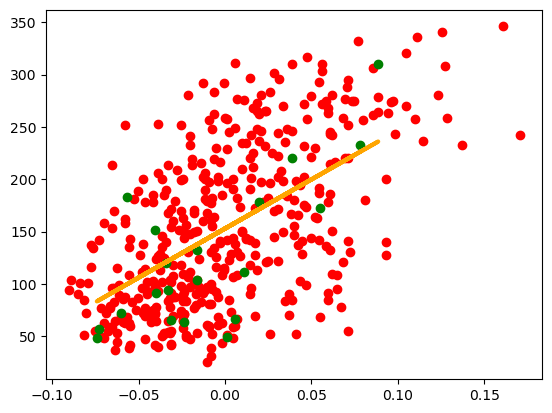

In [3]:
# Plot
plt.scatter(diabetes_X_train, diabetes_y_train, color="red")
plt.scatter(diabetes_X_test, diabetes_y_test, color="green")
plt.plot(diabetes_X_test, diabetes_y_pred, color="orange", linewidth=3)
plt.show()

**Esempio** con tutte le feature

In [4]:
from sklearn.model_selection import train_test_split

X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

lregr = LinearRegression().fit(X_train, y_train)
print('Coeff: ',lregr.coef_, '\nintercetta:', lregr.intercept_)

print('\nR^2: %.2f'%(lregr.score(X_test, y_test))) # R^2 default 
y_pred = lregr.predict(X_test)
print('MSE: %.2f'%(mean_squared_error(y_pred,y_test)))

Coeff:  [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105] 
intercetta: 151.00821291456543

R^2: 0.48
MSE: 2821.75


### Modelli OLS a Coefficienti non Negativi

esempio nella [doc](https://scikit-learn.org/stable/auto_examples/linear_model/plot_nnls.html) con `LinearRegression`

#### Plot di Predizioni dopo CV

esempio dalla [doc](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html) con uso di
- [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) da `model_selection`
- [`PredictionErrorDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html) da `sklearn.metrics`

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()

y_pred = cross_val_predict(lr, X, y, cv=10)

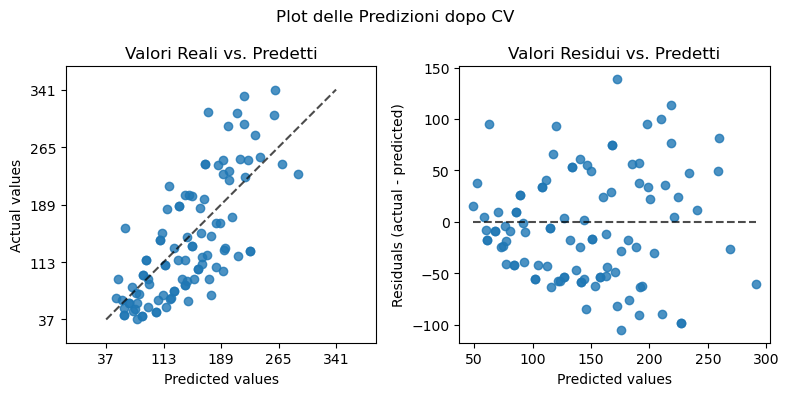

In [6]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Valori Reali vs. Predetti")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Valori Residui vs. Predetti")
fig.suptitle("Plot delle Predizioni dopo CV")
plt.tight_layout()
plt.show()

## Regressione Lineare e Regolarizzazione

In [7]:
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

lr = LinearRegression().fit(X_train, y_train)
print(lr)
print('coeff: ',lr.coef_)
print('intercetta: %.2f'%(lr.intercept_))

print('\nR^2: %.2f'%(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

print()
lr_pos = LinearRegression(positive=True).fit(X_train, y_train)
print(lr_pos)
print('coeff: ',lr_pos.coef_)
print('intercetta: %.2f'%(lr_pos.intercept_))

print('\nR^2: %.2f'%(lr_pos.score(X_test, y_test)))
y_pred = lr_pos.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

LinearRegression()
coeff:  [ 4.41037995e-01  9.68801816e-03 -1.04781309e-01  6.22052706e-01
 -5.61452681e-06 -3.28792384e-03 -4.23182318e-01 -4.37898856e-01]
intercetta: -37.29

R^2: 0.60
MAE: 0.54

LinearRegression(positive=True)
coeff:  [4.38547050e-01 1.87967926e-02 0.00000000e+00 4.03954101e-02
 3.02498540e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]
intercetta: -0.25

R^2: 0.50
MAE: 0.61


### Ridge Regression

$J(\mathbf{w})= \text{MSE}(\mathbf{w})+\alpha\dfrac{1}{2}\sum_i w_i^2$

[`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge) anche classi comprendenti la CV

#### Interpretazione Geometrica della Regolarizzazione L2

<img src='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch04/images/04_05.png' width=500> 

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.1).fit(X_train, y_train)
print(ridge)
print('coeff: ',ridge.coef_)
print('intercetta: %.2f'%(ridge.intercept_))

print('\nR^2: %.2f'%(ridge.score(X_test, y_test)))
y_pred = ridge.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

Ridge(alpha=0.1)
coeff:  [ 4.41024868e-01  9.68825707e-03 -1.04756428e-01  6.21923353e-01
 -5.61353979e-06 -3.28789496e-03 -4.23179661e-01 -4.37894303e-01]
intercetta: -37.28

R^2: 0.60
MAE: 0.54


### Cross Validation con `RidgeCV`

[`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) implementa la regressione con una CV integrata del parametro `alfa`
- CV che funziona allo stesso modo di `GridSearchCV`, con impostazione predefinita che prevede una forma efficiente di _Leave-One-Out_.
    - quando si utilizza la CV predefinita, `alfa` non può essere `0` a causa della formulazione utilizzata per calcolare l'errore _Leave-One-Out_.

### LASSO

#### Soluzioni Sparse con Regolarizzazione L1

$J(\mathbf{w}) = \text{MSE}(\mathbf{w}) + \alpha  \sum_i |w|_i =  \dfrac{1}{2N} \|y - \mathbf{Xw}\|^2_2 + \alpha  \|\mathbf{w}\|_1$

[`sklearn.linear_model.Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso)

<img src='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch04/images/04_06.png' width=500> 

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.5).fit(X_train, y_train)
print('LASSO')
print('coeff: ',lasso.coef_)
print('intercetta: %.2f'%(lasso.intercept_))

print('\nR^2: %.2f'%(lasso.score(X_test, y_test)))
y_pred = lasso.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

LASSO
coeff:  [ 2.92405875e-01  1.22657706e-02  0.00000000e+00 -0.00000000e+00
  9.20528584e-06 -9.37884247e-05 -0.00000000e+00 -0.00000000e+00]
intercetta: 0.58

R^2: 0.46
MAE: 0.66


### Elastic-Net

[`sklearn.linear_model.ElasticNet`](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) 

Combina regolarizzazione L1 e L2
- obiettivo: $$\min_\mathbf{w} \frac{1}{N}\|\mathbf{Xw}-y\|^2_2 + \alpha\rho\|\mathbf{w}\|_1 + \frac{1}{2}\alpha(1-\rho)\|\mathbf{w}\|_2$$
    - $\alpha$ param. regolarizzazione, $\rho$ penalizzazione L1



In [10]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.1).fit(X_train, y_train)
print(elasticnet)
print('coeff: ',elasticnet.coef_)
print('intercetta: %.2f'%(elasticnet.intercept_))

print('\nR^2: %.2f'%(elasticnet.score(X_test, y_test)))
y_pred = elasticnet.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

ElasticNet(alpha=0.1, l1_ratio=0.1)
coeff:  [ 3.88996699e-01  1.22165841e-02 -3.22287592e-03  7.14556468e-02
  4.21282896e-06 -3.27197338e-03 -3.21413462e-01 -3.22347661e-01]
intercetta: -26.93

R^2: 0.58
MAE: 0.55


### Percorsi di Regolarizzazione

#### **Esempio** adattato dalla [doc](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lasso_lars_elasticnet_path.html)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


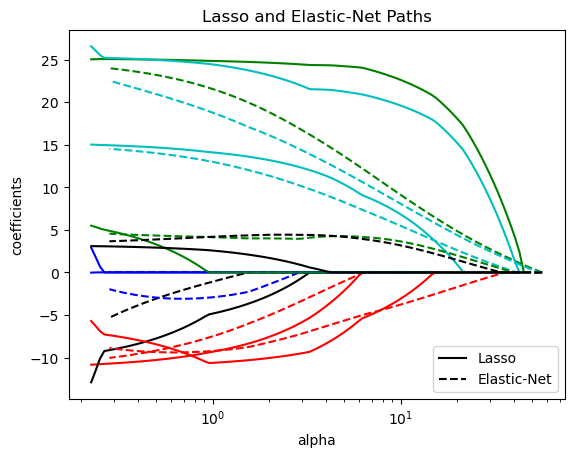

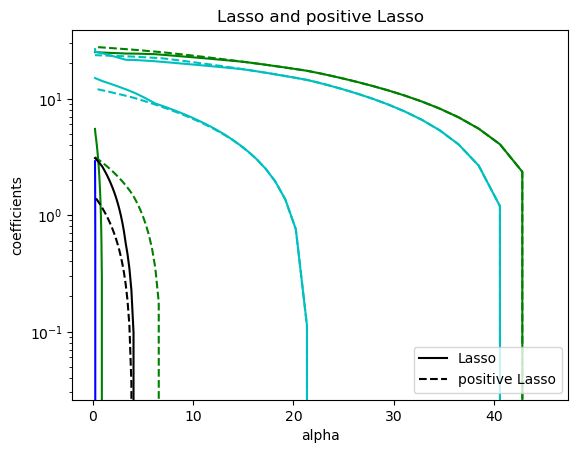

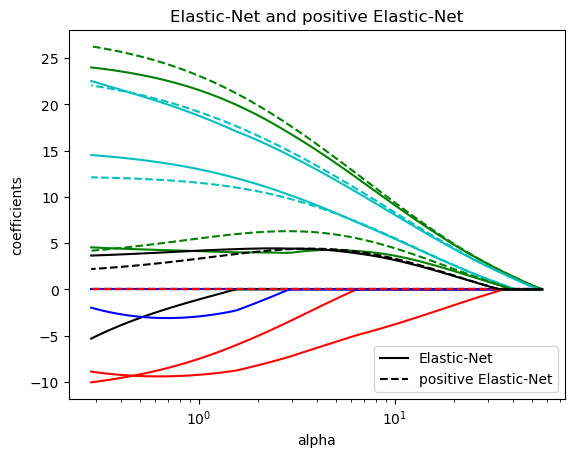

In [11]:
from sklearn.linear_model import enet_path, lasso_path
from itertools import cycle


X, y = load_diabetes(return_X_y=True)
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# calcolo percorsi

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)



plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.semilogx(alphas_lasso, coef_l, c=c)
    l2 = plt.semilogx(alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower right")
plt.axis("tight")


plt.figure(2)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.semilogy(alphas_lasso, coef_l, c=c)
    l2 = plt.semilogy(alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower right")
plt.axis("tight")


plt.figure(5)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.semilogx(alphas_enet, coef_e, c=c)
    l2 = plt.semilogx(alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower right")
plt.axis("tight")
plt.show()

## Altri regressori 

#### [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # solo una feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, 
                                                    shuffle=False)

regressor = SGDRegressor(max_iter=10000).fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f"R^2: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

R^2: 0.43
MSE: 2750.79


## Selezione Modelli (regressione)


### Over- e Underfitting

adattamento di un [esempio](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#) dalla doc di sklearn


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 5, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

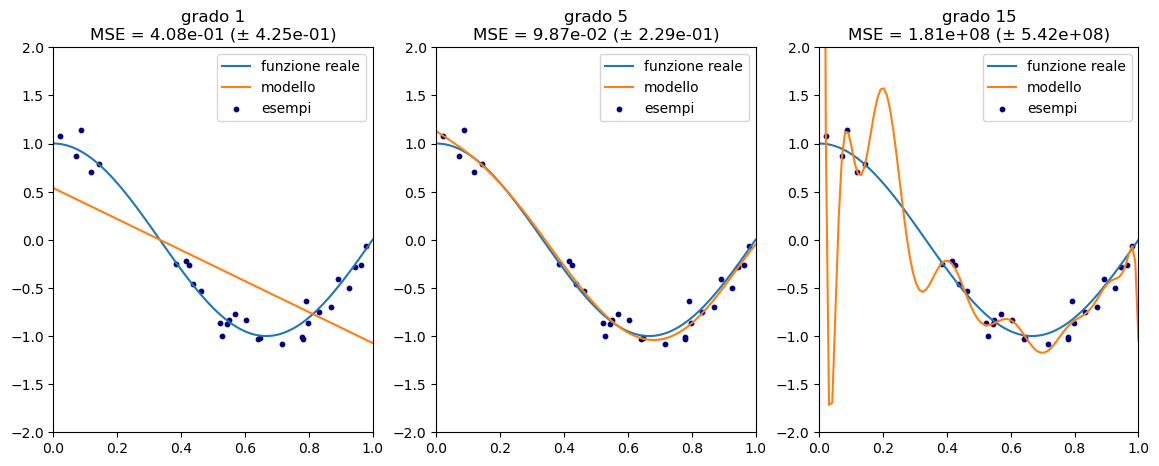

In [14]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", 
                          polynomial_features),
                         ("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)
    # valutazione modelli tramite CV 
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, 
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, true_fun(X_test), label="funzione reale")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="modello")
    plt.scatter(X, y, s=10, label="esempi", color='navy')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("grado {}\nMSE = {:.2e} (± {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

### Esempio: Modelli L1 per Segnali Sparsi 

dalla [doc](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)


- Si generiamo un dataset con un numero di campioni inferiore al numero totale di feature: sistema _sottodeterminato_, i.e. soluzione <u>non unica</u>. Non si può applicare OLS da solo. Serve un termine di _regolarizzazione_.
    - Obiettivo `y` combinazione lineare a segni alternati di segnali sinusoidali.
    - Solo le `10` frequenze più basse delle `100` in X utilizzate per generare `y`, il resto delle caratteristiche non è informativo.
    - Spazio di feature sparse ad alta dimensionalità, in cui è necessario un certo grado di penalizzazione l1.

In [15]:
from time import time
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ARDRegression


rng = np.random.RandomState(0)
n_samples, n_features, n_informative = 50, 100, 10
time_step = np.linspace(-2, 2, n_samples)
freqs = 2 * np.pi * np.sort(rng.rand(n_features)) / 0.01
X = np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step)

idx = np.arange(n_features)
true_coef = (-1) ** idx * np.exp(-idx / 10)
true_coef[n_informative:] = 0  # rende sparsi i coefficienti
y = np.dot(X, true_coef)

Viene introdotta una fase casuale utilizzando `numpy.random.random_sample` e viene aggiunto del rumore gaussiano (implementato da `numpy.random.normal`) sia alle feature di input che al target.

In [16]:
for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step + 2 * (rng.random_sample() - 0.5))
    X[:, i] += 0.2 * rng.normal(0, 1, n_samples)

y += 0.2 * rng.normal(0, 1, n_samples)

visualizzazione:

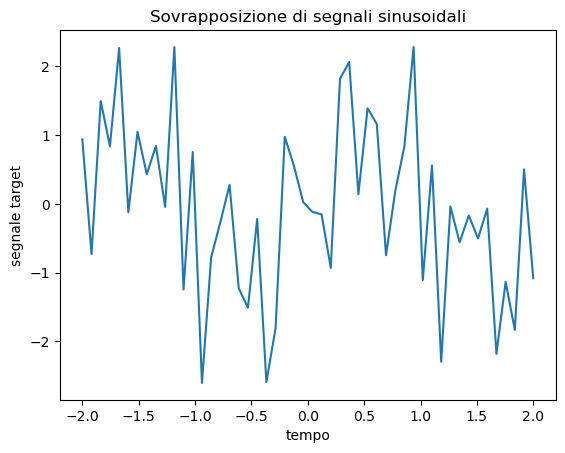

In [17]:
plt.plot(time_step, y)
plt.ylabel("segnale target")
plt.xlabel("tempo")
_ = plt.title("Sovrapposizione di segnali sinusoidali")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

In [19]:
t0 = time()
lasso = Lasso(alpha=0.14).fit(X_train, y_train)
print(f"Lasso addestrato in {(time() - t0):.3f}s")

y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso r^2 su test: {r2_score_lasso:.3f}")

Lasso addestrato in 0.005s
Lasso r^2 su test: 0.480


In [20]:
t0 = time()
ard = ARDRegression().fit(X_train, y_train)
print(f"ARD addestrato in {(time() - t0):.3f}s")
y_pred_ard = ard.predict(X_test)
r2_score_ard = r2_score(y_test, y_pred_ard)
print(f"ARD r^2 su test: {r2_score_ard:.3f}")

ARD addestrato in 0.426s
ARD r^2 su test: 0.543


In [21]:
t0 = time()
enet = ElasticNet(alpha=0.08, l1_ratio=0.5).fit(X_train, y_train)
print(f"ElasticNet addestrato in {(time() - t0):.3f}s")

y_pred_enet = enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(f"ElasticNet r^2 su test: {r2_score_enet:.3f}")

ElasticNet addestrato in 0.008s
ElasticNet r^2 su test: 0.636


## Regressione Robusta

### [`HuberRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html)
- es. [Ridge vs Huiber](https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html)

### [`RANSACRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)
- es. [RANSAC su dataset artificiale](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html)
- es. [Huber, OLS, RANSAC,TheilSen](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html)

## Regressione Bayesiana

### [`BayesianRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html)
- es. [Sinusoidi](https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html)

### [`ARDRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html)
- es. [OLS, Ridge, ARD](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html)

## Altri approcci implementati in `scikit-learn`

### [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression) e [LARS Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso)
### [Orthogonal Matching Pursuit (OMP)](https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp)
### [Regressione con SGD](https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd) 
### [Regressione con algoritmi Passive Aggressive](https://scikit-learn.org/stable/modules/linear_model.html#passive-aggressive-algorithms)
### [Regressione basata su Quantili](https://scikit-learn.org/stable/modules/linear_model.html#quantile-regression)
### [Regressione Polinomiale](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)
### Approcci MultiTask: [`MultiTaskLasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html), [`MultiTaskElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html)
### [Modelli Lineari Generalizzati (GLM)](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models) °


## Esercizi

- confronto di più regressori della stessa categoria su un dataset concordato con CV e fine tuning degli iperparametri; metriche: $R^2$ e $RMSE$
- confronto di più regressori di categorie diverse su un dataset concordato con CV e fine tuning degli iperparametri; metriche: $R^2$ e $MAE$